In [1]:
from renju import run, run_test, Player
from agent import BackendAgent, HumanAgent, Agent, CnnAgent, BeamSearchAgent, ComplexCnnAgent, RandomBeamSearchAgent, RBSAcombined
from keras.models import load_model
import tensorflow as tf
from mcts import MCTS

import collections
import itertools
import logging
import time
import util
import subprocess
import abc

%matplotlib notebook

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
papa_black = load_model('papa_black4096.h5')
papa_black_graph = tf.get_default_graph()
papa_white = load_model('papa_white4096.h5')
papa_white_graph = tf.get_default_graph()

/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py:1271: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [3]:
Human = HumanAgent('Oleg')

In [4]:
Policy_black = CnnAgent(color = 'black', name = 'black_cnn', model = (papa_black, papa_black_graph), verbose = 0)
Policy_white = CnnAgent(color = 'white', name = 'white_cnn', model = (papa_white, papa_white_graph), verbose = 0)

In [5]:
BeamSearchBlack = RandomBeamSearchAgent(color = 'black', name = 'TreeBlack', 
                   black_model = (papa_black, papa_black_graph), 
                   white_model = (papa_white, papa_white_graph), 
                   timeout = 14.75, high = 16, gamma = 1, fine = 1.0, bonus = 1.0, verbose = 0)
BeamSearchWhite = RandomBeamSearchAgent(color = 'white', name = 'TreeWlack', 
                   black_model = (papa_black, papa_black_graph), 
                   white_model = (papa_white, papa_white_graph), 
                   timeout = 14.75, high = 16, gamma = 1, fine = 1.0, bonus = 1.0, verbose = 0)

In [6]:
mcts_agent = MCTS(name = 'MCTSSLOW', 
                   black_model = (papa_black, papa_black_graph), 
                   white_model = (papa_white, papa_white_graph),
                   black_rollout = (papa_black, papa_black_graph), 
                   white_rollout = (papa_white, papa_white_graph), 
                   timeout = 14.75, high = 14, gamma = 0.99, verbose = 0, min_prob = 0.8, param1 = 0.2, param2 = 0.65)

To play with agents run the next cell:
* Left - is black agent
* Right - is white agent

<IPython.core.display.Javascript object>


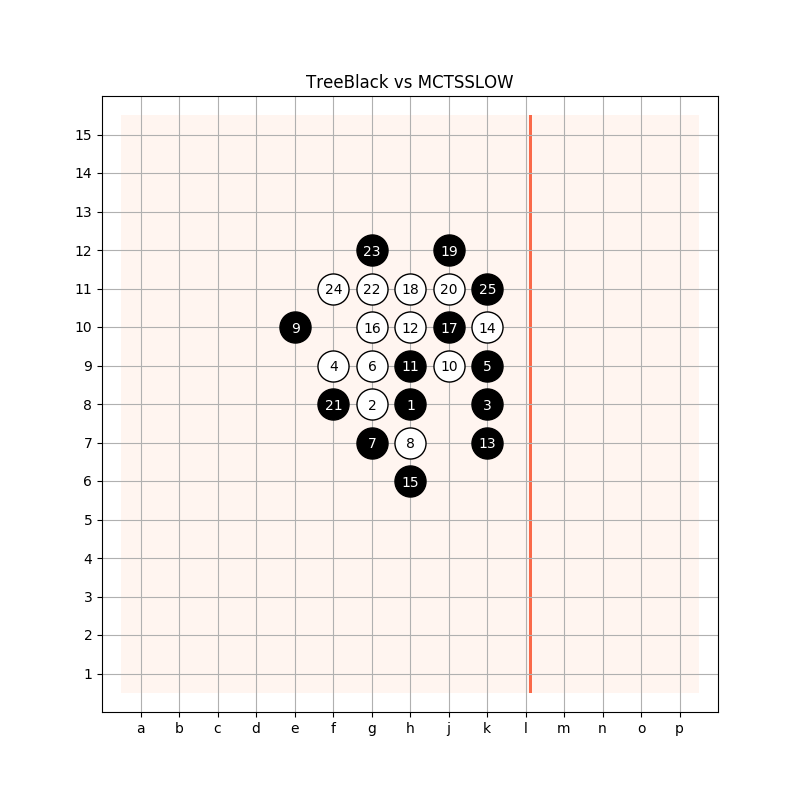

white

In [7]:
run_test(BeamSearchBlack, mcts_agent)